<a href="https://colab.research.google.com/github/mehrdadamini/-texas_data_set/blob/test/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library we need

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

In [68]:
import os
os.chdir("/content/drive/My Drive")
!ls

 Amini.pdf	    project.ipynb		    Untitled0.ipynb
 amini.pptx	    Song-from-a-secret-garden.pdf  'well log'
'Colab Notebooks'   Stablity_Analysis.rar	   'دانشکده مهندسی نفت.docx'
 mehrdad1.png	    texas_project


#import function that I wrote before

In [71]:
%cd ./texas_project/-texas_data_set/logs

/content/drive/MyDrive/texas_project/-texas_data_set


In [102]:
from wellLogdisply import *

#read data from google drive

In [103]:
%cd ../

/content/drive/MyDrive/texas_project/-texas_data_set


In [76]:
# directory = 'gdrive/My Drive/texas_project/-texas_data_set/'
df = pd.read_csv( 'training_data.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [78]:
wells = df.groupby('Well Name')
wells.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664000,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661000,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658000,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655000,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647000,13.500,13.300,3.400,1,0.915
471,2,A1 SH,SHANKLE,2774.5,98.360,0.642000,-0.100,18.685,2.900,1,1.000
472,2,A1 SH,SHANKLE,2775.0,97.570,0.631000,7.900,16.745,3.200,1,0.984
473,2,A1 SH,SHANKLE,2775.5,98.410,0.615000,12.800,14.105,3.200,1,0.968
474,2,A1 SH,SHANKLE,2776.0,85.920,0.597000,13.000,13.385,3.400,1,0.952
475,2,A1 SH,SHANKLE,2776.5,83.160,0.592000,12.300,13.345,3.400,1,0.935


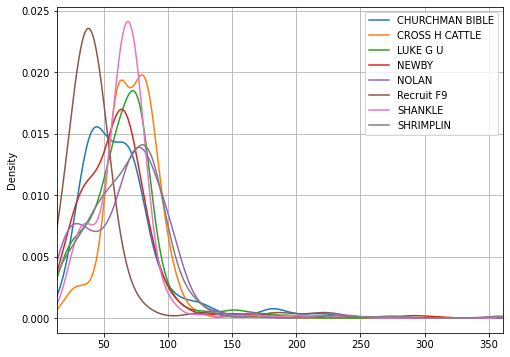

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.GR.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(data.GR.min(),data.GR.max())
plt.grid(True)
plt.legend()
plt.show()

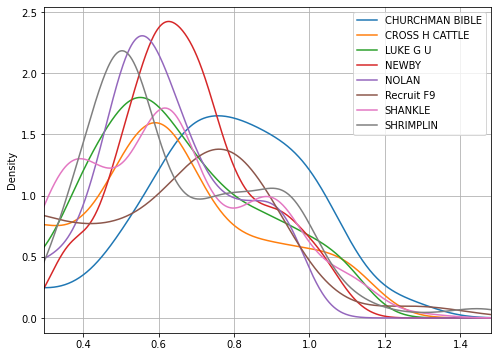

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.ILD_log10.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(data.ILD_log10.min(),data.ILD_log10.max())
plt.grid(True)
plt.legend()
plt.show()

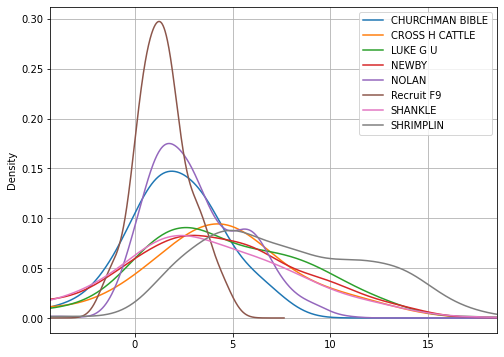

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.DeltaPHI.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(data.DeltaPHI.min(),data.DeltaPHI.max())
plt.grid(True)
plt.legend()
plt.show()

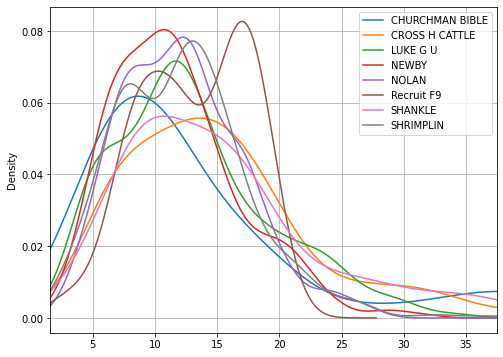

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.PHIND.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(data.PHIND.min(),data.PHIND.max())
plt.grid(True)
plt.legend()
plt.show()

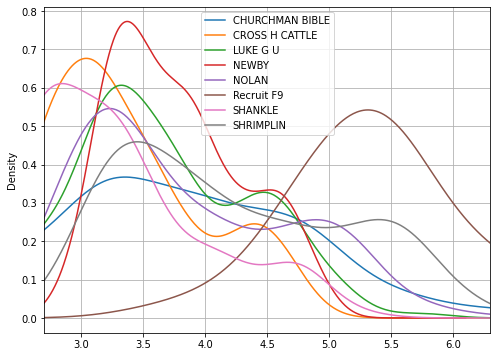

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.PE.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(data.PE.min(),data.PE.max())
plt.grid(True)
plt.legend()
plt.show()

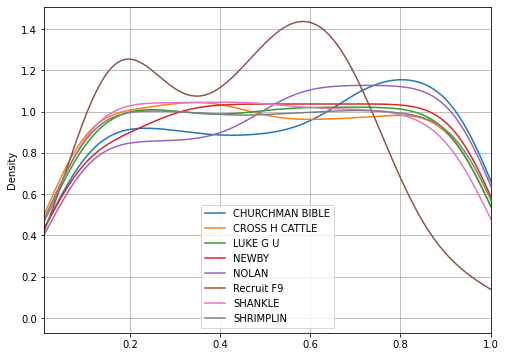

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.RELPOS.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(data.RELPOS.min(),data.RELPOS.max())
plt.grid(True)
plt.legend()
plt.show()

In [85]:
gr_percentils_05 = df.groupby('Well Name')['GR'].quantile(0.05)
print(gr_percentils_05)

Well Name
CHURCHMAN BIBLE    30.7598
CROSS H CATTLE     36.9580
LUKE G U           21.7600
NEWBY              21.0740
NOLAN              19.0972
Recruit F9         21.6043
SHANKLE            28.8520
SHRIMPLIN          18.2700
Name: GR, dtype: float64


In [86]:
gr_percentile_05 = df.groupby('Well Name')['GR'].quantile(0.05)
df['05_PERC'] = df['Well Name'].map(gr_percentile_05)
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,4.384289,2910.501062,69.408896,0.659679,7.708493,12.173705,4.219958,1.488323,0.514482
std,2.207070,68.055644,37.299536,0.232894,4.279453,5.317152,0.902823,0.500395,0.289757
min,2.000000,2793.000000,13.280000,0.297000,-4.300000,1.590000,2.700000,1.000000,0.010000
25%,2.500000,2851.750000,46.895000,0.486000,4.300000,8.065000,3.400000,1.000000,0.261000
50%,3.000000,2910.500000,69.480000,0.580000,7.300000,12.170000,4.000000,1.000000,0.513000
75%,6.000000,2969.250000,85.995000,0.827500,11.150000,15.127500,5.000000,2.000000,0.765000
max,9.000000,3028.000000,361.150000,1.480000,18.500000,37.470000,6.300000,2.000000,1.000000


In [87]:
gr_percentile_95 = df.groupby('Well Name')['GR'].quantile(0.95)
df['95_PERC'] = df['Well Name'].map(gr_percentile_95)
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,4.384289,2910.501062,69.408896,0.659679,7.708493,12.173705,4.219958,1.488323,0.514482
std,2.207070,68.055644,37.299536,0.232894,4.279453,5.317152,0.902823,0.500395,0.289757
min,2.000000,2793.000000,13.280000,0.297000,-4.300000,1.590000,2.700000,1.000000,0.010000
25%,2.500000,2851.750000,46.895000,0.486000,4.300000,8.065000,3.400000,1.000000,0.261000
50%,3.000000,2910.500000,69.480000,0.580000,7.300000,12.170000,4.000000,1.000000,0.513000
75%,6.000000,2969.250000,85.995000,0.827500,11.150000,15.127500,5.000000,2.000000,0.765000
max,9.000000,3028.000000,361.150000,1.480000,18.500000,37.470000,6.300000,2.000000,1.000000


In [88]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
  return ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))

In [89]:
key_well_high = df.groupby('Well Name').get_group("SHANKLE")['GR'].max()
key_well_low = df.groupby('Well Name').get_group("SHANKLE")['GR'].min()

In [90]:
df['GR_NORM'] = df.apply(lambda x: normalise(x['GR'], key_well_low, key_well_high, x['05_PERC'], x['95_PERC']), axis=1)

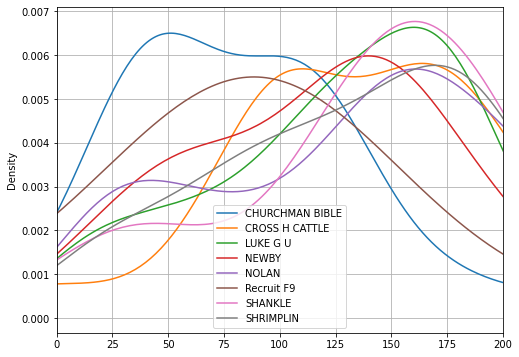

In [91]:
wells = df.groupby('Well Name')
fig, ax = plt.subplots(figsize=(8, 6))
for label, data in wells:
  data.GR_NORM.plot(kind = 'kde', ax = ax, label = label)
  plt.xlim(0,200)
plt.grid(True)
plt.legend()
plt.show()

# transform categorical formation features into numerical features by labelencoder

In [92]:
le = LabelEncoder()
le.fit(df['Formation'])
df['Formation'] = le.transform(df['Formation'])
#le.inverse_transform(df['Formation'])
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,05_PERC,95_PERC,GR_NORM
0,3,1,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,18.27,110.1,162.982740
1,3,1,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,18.27,110.1,164.961652
2,3,1,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,18.27,110.1,166.891702
3,3,1,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,18.27,110.1,184.115567
4,3,1,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,18.27,110.1,155.971039


#Separate data

##separate test data

In [93]:
grouped = df.groupby('Well Name')
blind_df = grouped.get_group("SHANKLE").drop(labels="Well Name", axis=1)
blind_df

,Facies,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,05_PERC,95_PERC,GR_NORM
471,2,1,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000,28.852,91.806,266.106576
472,2,1,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984,28.852,91.806,263.291243
473,2,1,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968,28.852,91.806,266.284762
474,2,1,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952,28.852,91.806,221.773984
475,2,1,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935,28.852,91.806,211.938136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,8,12,3006.0,32.84,1.120,-2.2,3.455,5.1,2,0.060,28.852,91.806,32.612088
916,8,12,3006.5,25.16,1.112,-1.6,2.890,4.8,2,0.045,28.852,91.806,5.242771
917,8,12,3007.0,25.16,1.112,-1.6,2.890,4.8,2,0.030,28.852,91.806,5.242771
918,4,12,3007.5,26.22,1.092,-0.4,3.400,4.5,2,0.030,28.852,91.806,9.020307


##separate train data

In [94]:
train_set = df.loc[df['Well Name'] !='SHANKLE']
train_set = df.loc[df['Well Name'] !='Recruit F9']
train_set = train_set.drop(labels="Well Name", axis=1)
train_set

,Facies,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,05_PERC,95_PERC,GR_NORM
0,3,1,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,18.2700,110.10000,162.982740
1,3,1,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,18.2700,110.10000,164.961652
2,3,1,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,18.2700,110.10000,166.891702
3,3,1,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,18.2700,110.10000,184.115567
4,3,1,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,18.2700,110.10000,155.971039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,5,12,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,30.7598,124.54425,56.577401
3228,5,12,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,30.7598,124.54425,51.419844
3229,5,12,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,30.7598,124.54425,63.753963
3230,5,12,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,30.7598,124.54425,67.940292


##separate each well data

In [95]:
set1 = grouped.get_group("CHURCHMAN BIBLE").drop(labels="Well Name", axis=1)
set2 = grouped.get_group("CROSS H CATTLE").drop(labels="Well Name", axis=1)
set3 = grouped.get_group("LUKE G U").drop(labels="Well Name", axis=1)
set4 = grouped.get_group("NEWBY").drop(labels="Well Name", axis=1)
set5 = grouped.get_group("NOLAN").drop(labels="Well Name", axis=1)
set6 = grouped.get_group("Recruit F9").drop(labels="Well Name", axis=1)
set7 = grouped.get_group("SHRIMPLIN").drop(labels="Well Name", axis=1)

#display logs

##display logs for well number1

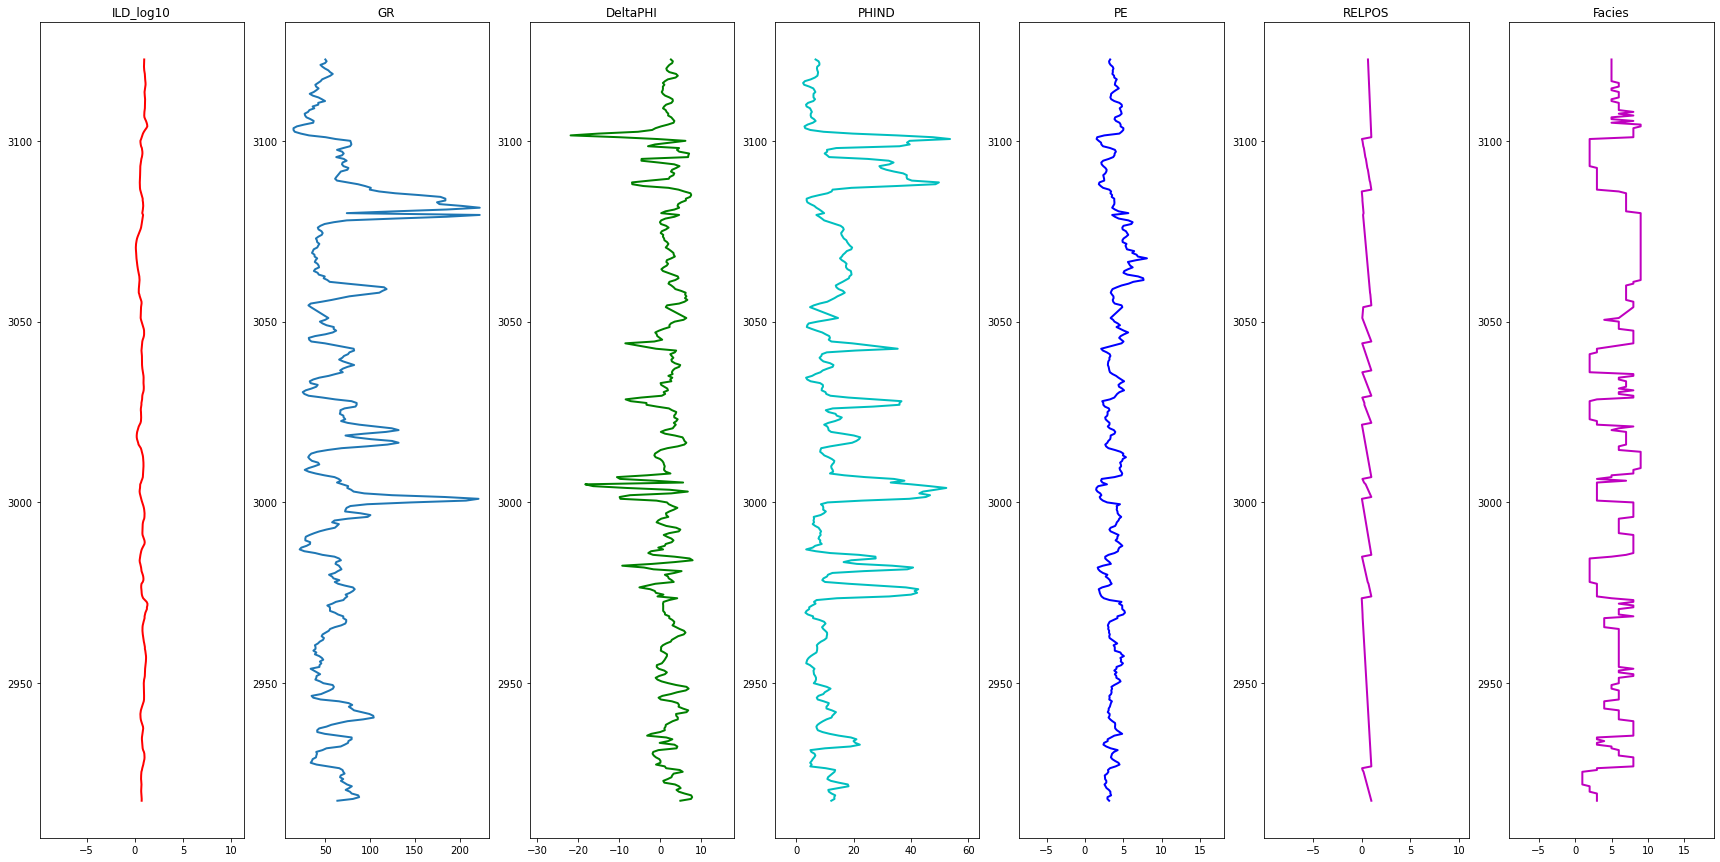

In [104]:
wellLogdisply(set1.sort_values("Depth"))

##display logs for well number2

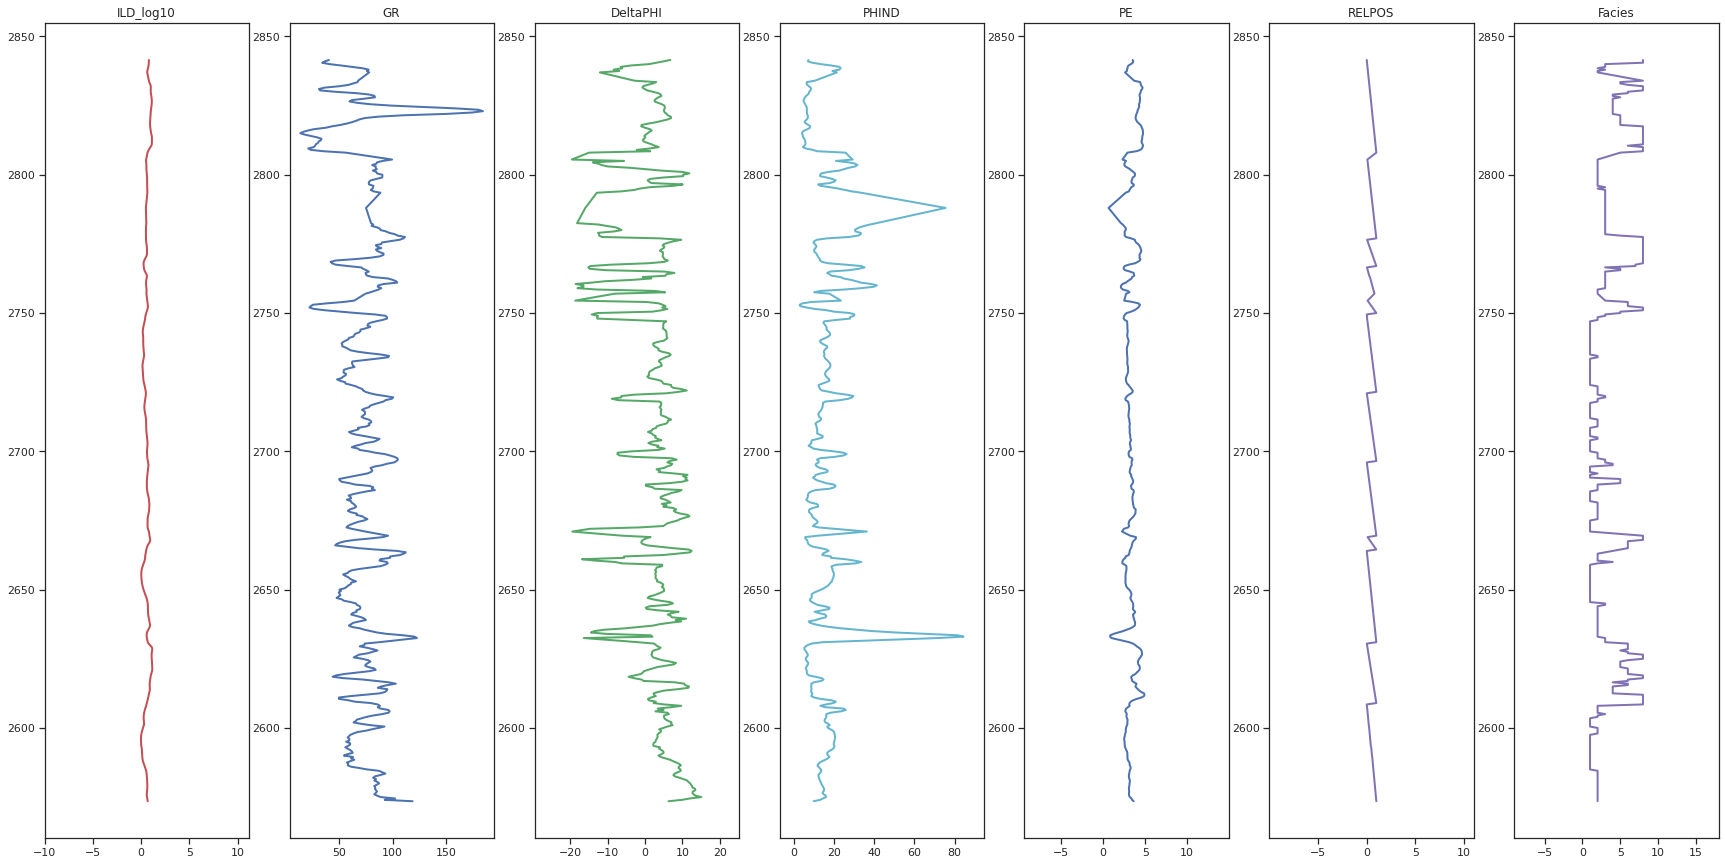

In [ ]:
wellLogdisply(set2.sort_values("Depth"))

##display logs for well number3

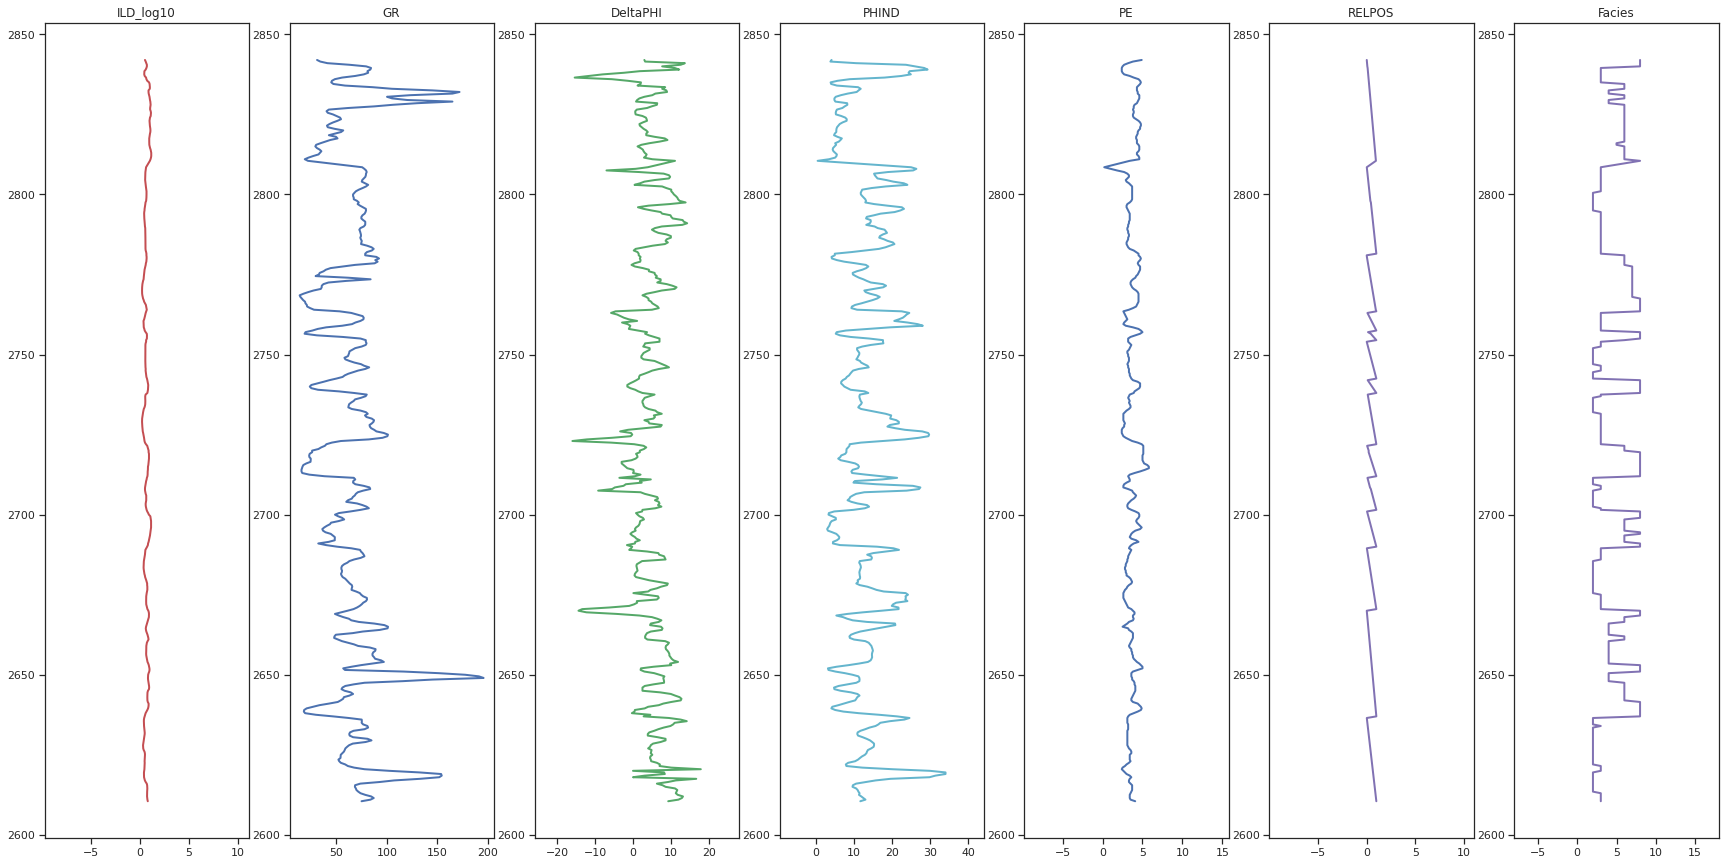

In [ ]:
wellLogdisply(set3.sort_values("Depth"))

##display logs for well number4

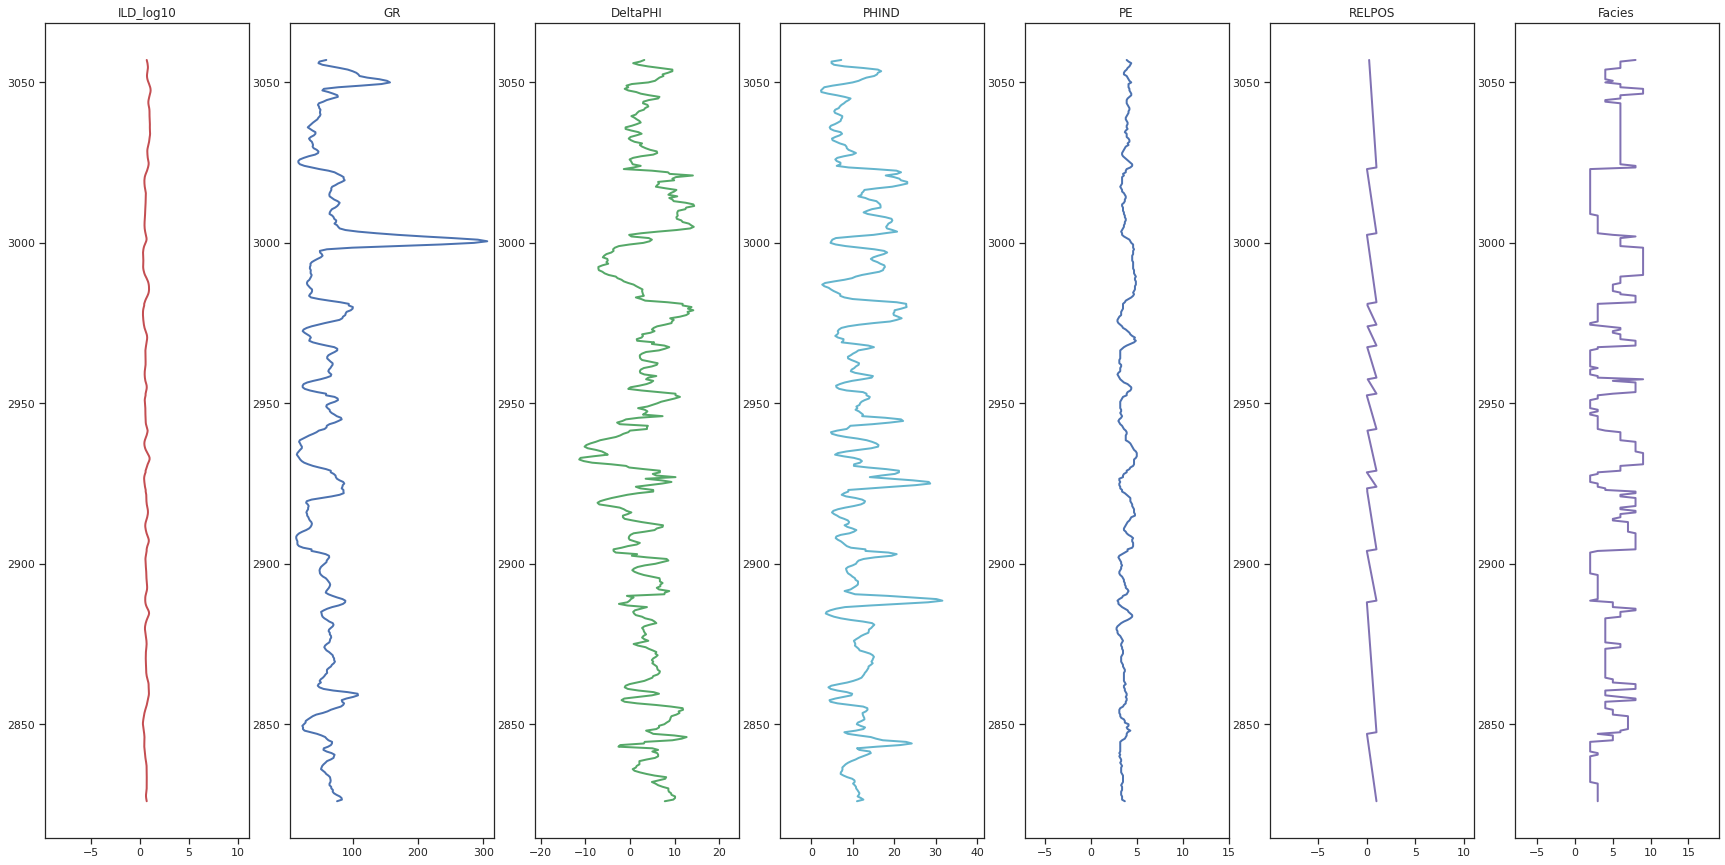

In [ ]:
wellLogdisply(set4.sort_values("Depth"))

##display logs for well number5

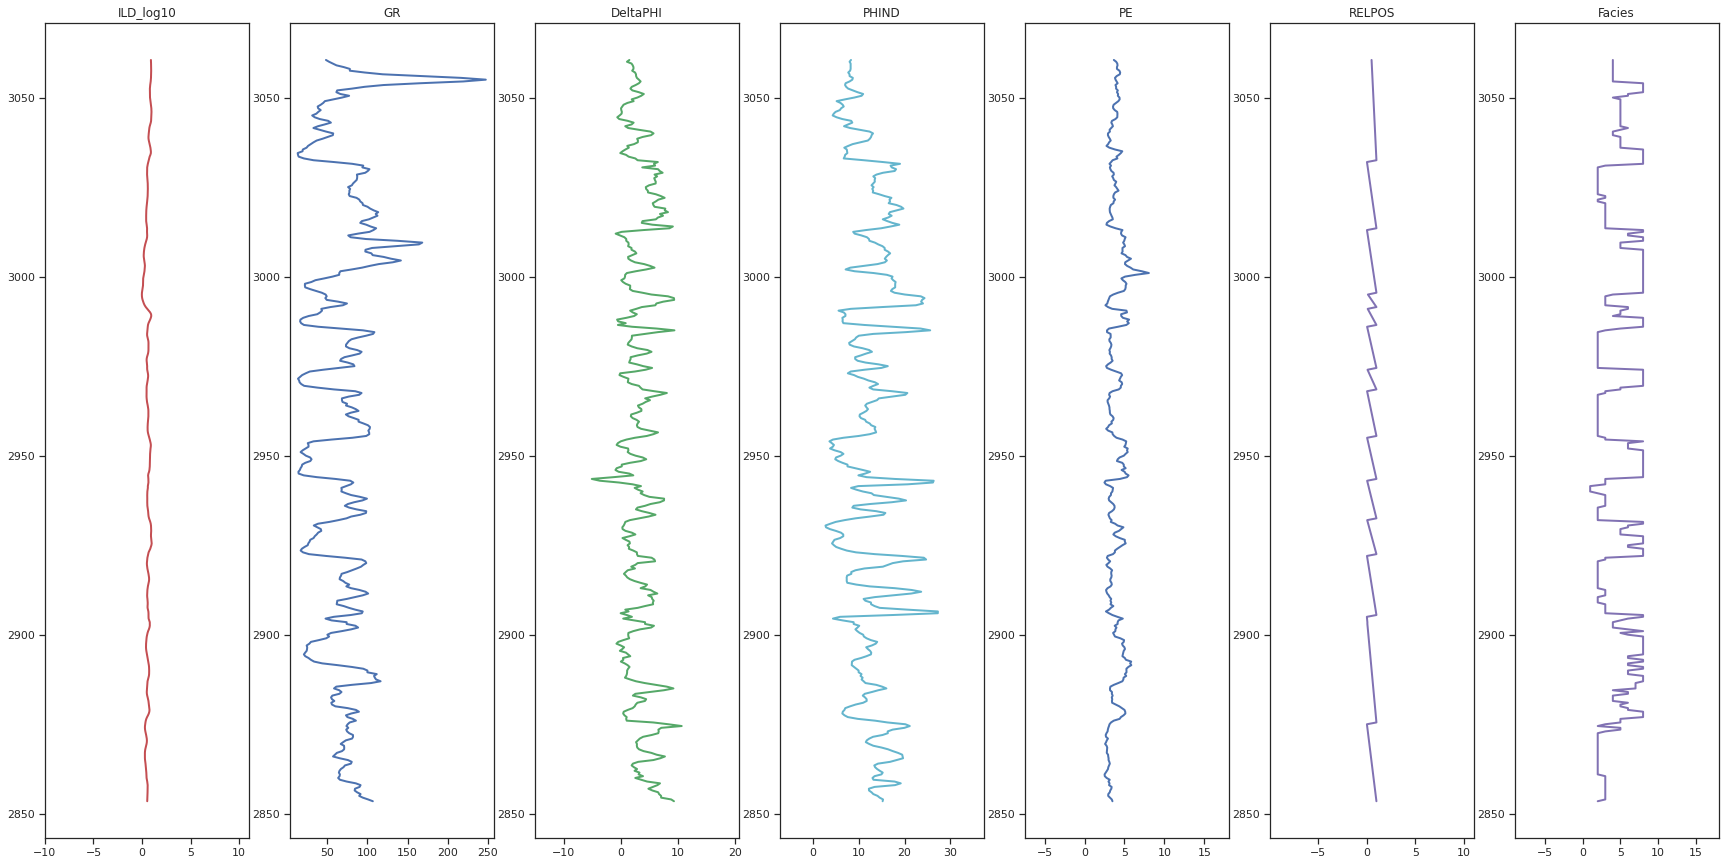

In [ ]:
wellLogdisply(set5.sort_values("Depth"))

##display logs for well number6

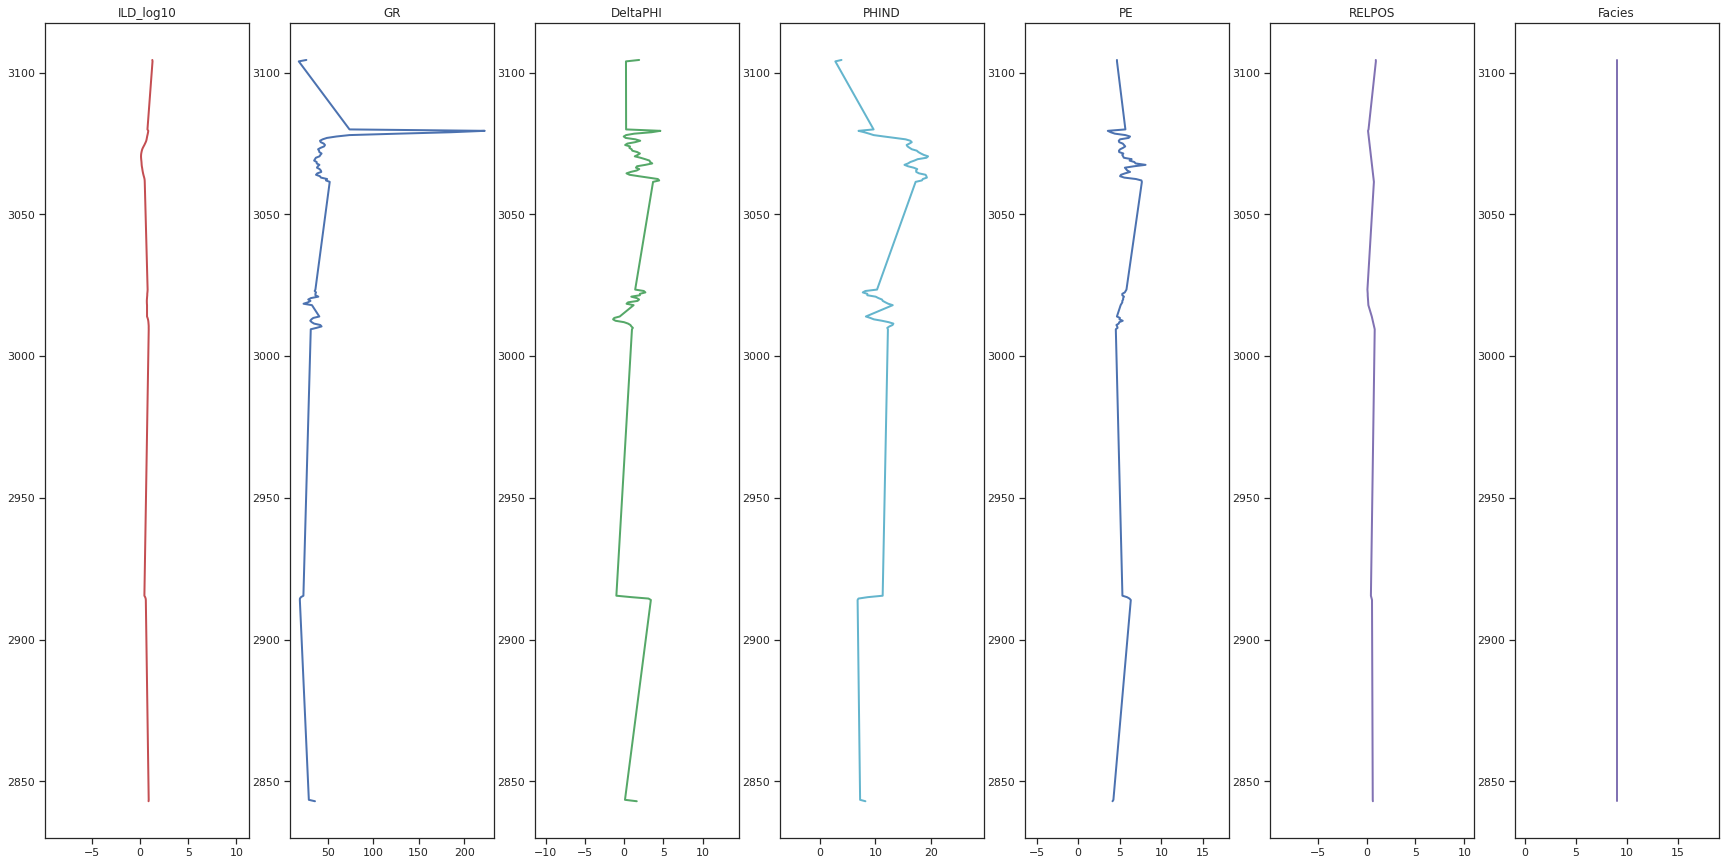

In [ ]:
wellLogdisply(set6.sort_values("Depth"))

##display logs for well number7

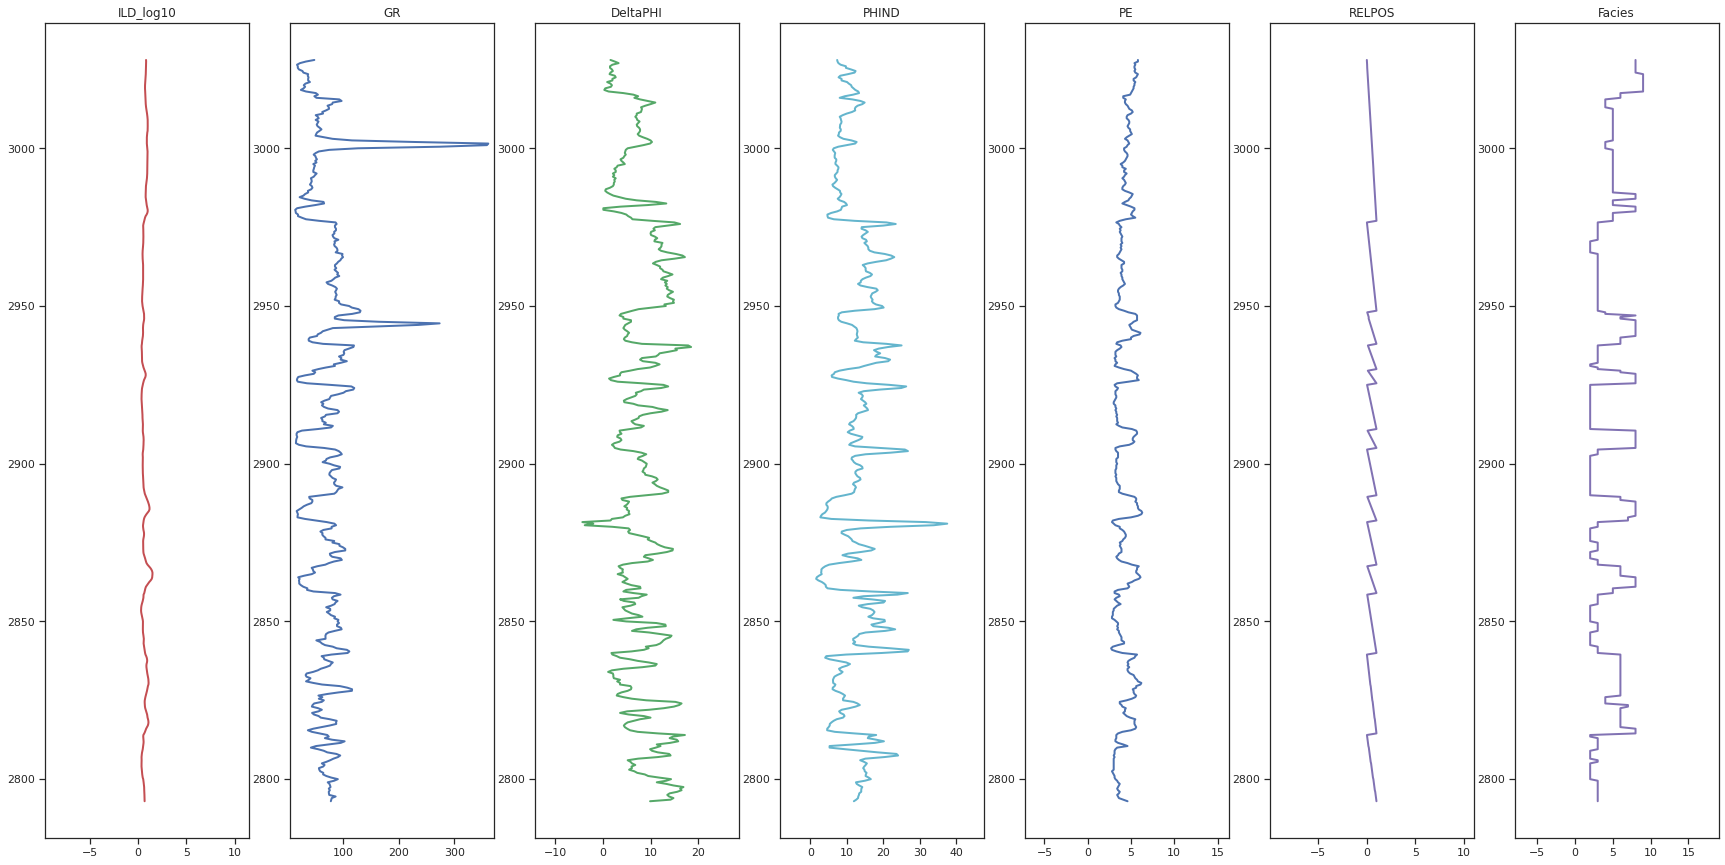

In [ ]:
wellLogdisply(set7.sort_values("Depth"))

##display logs for well test

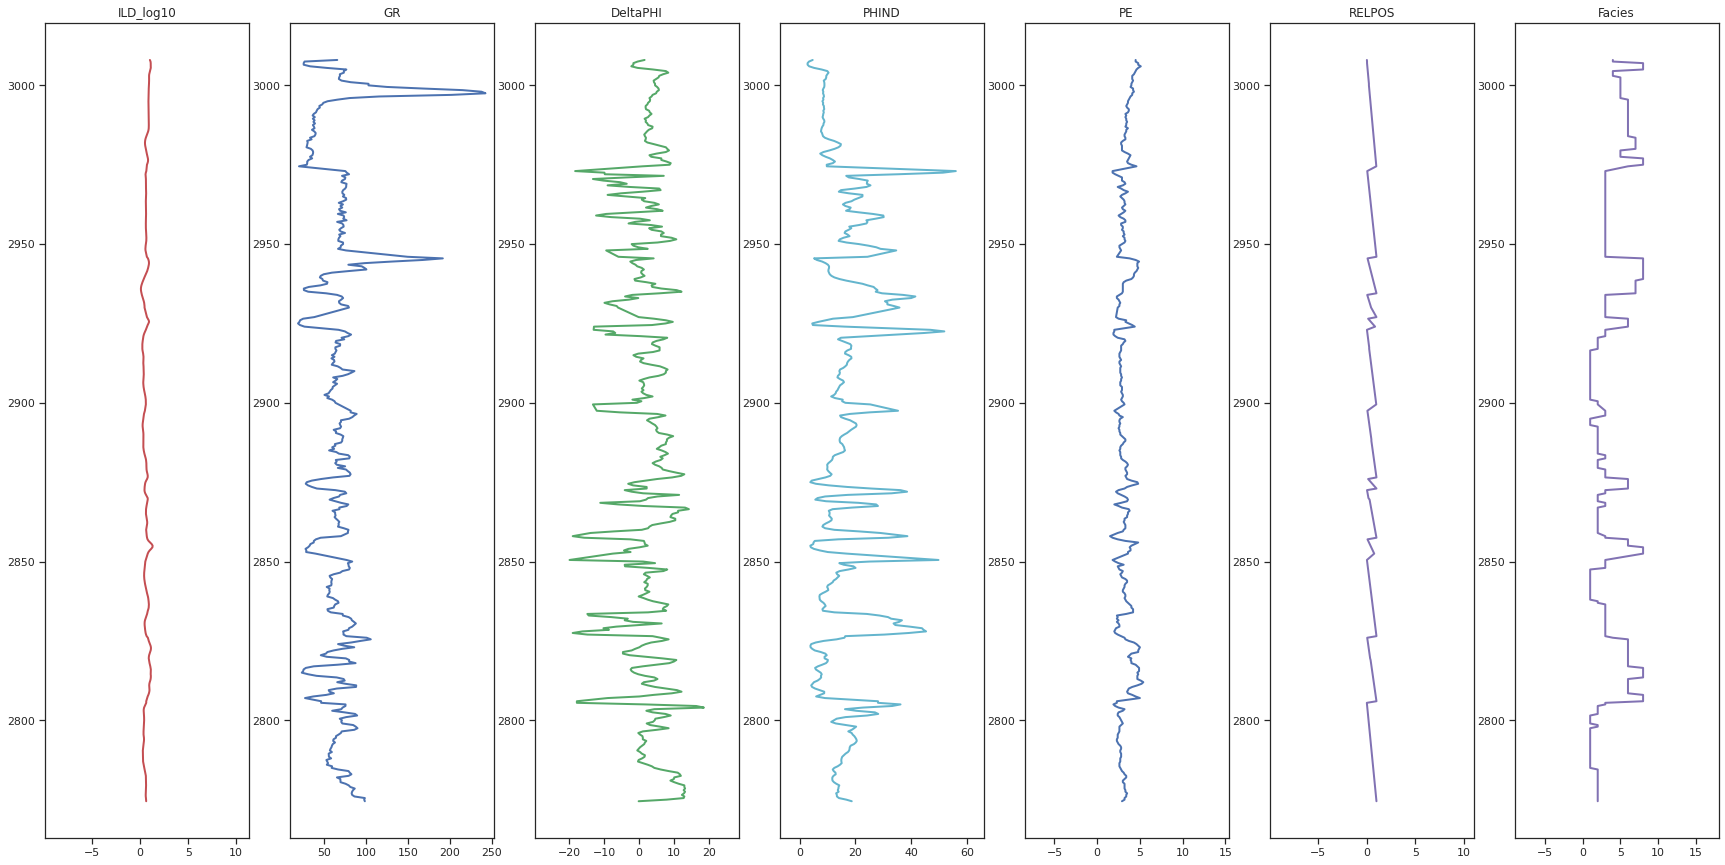

In [ ]:
wellLogdisply(blind_df.sort_values("Depth"))

##sample pairplot

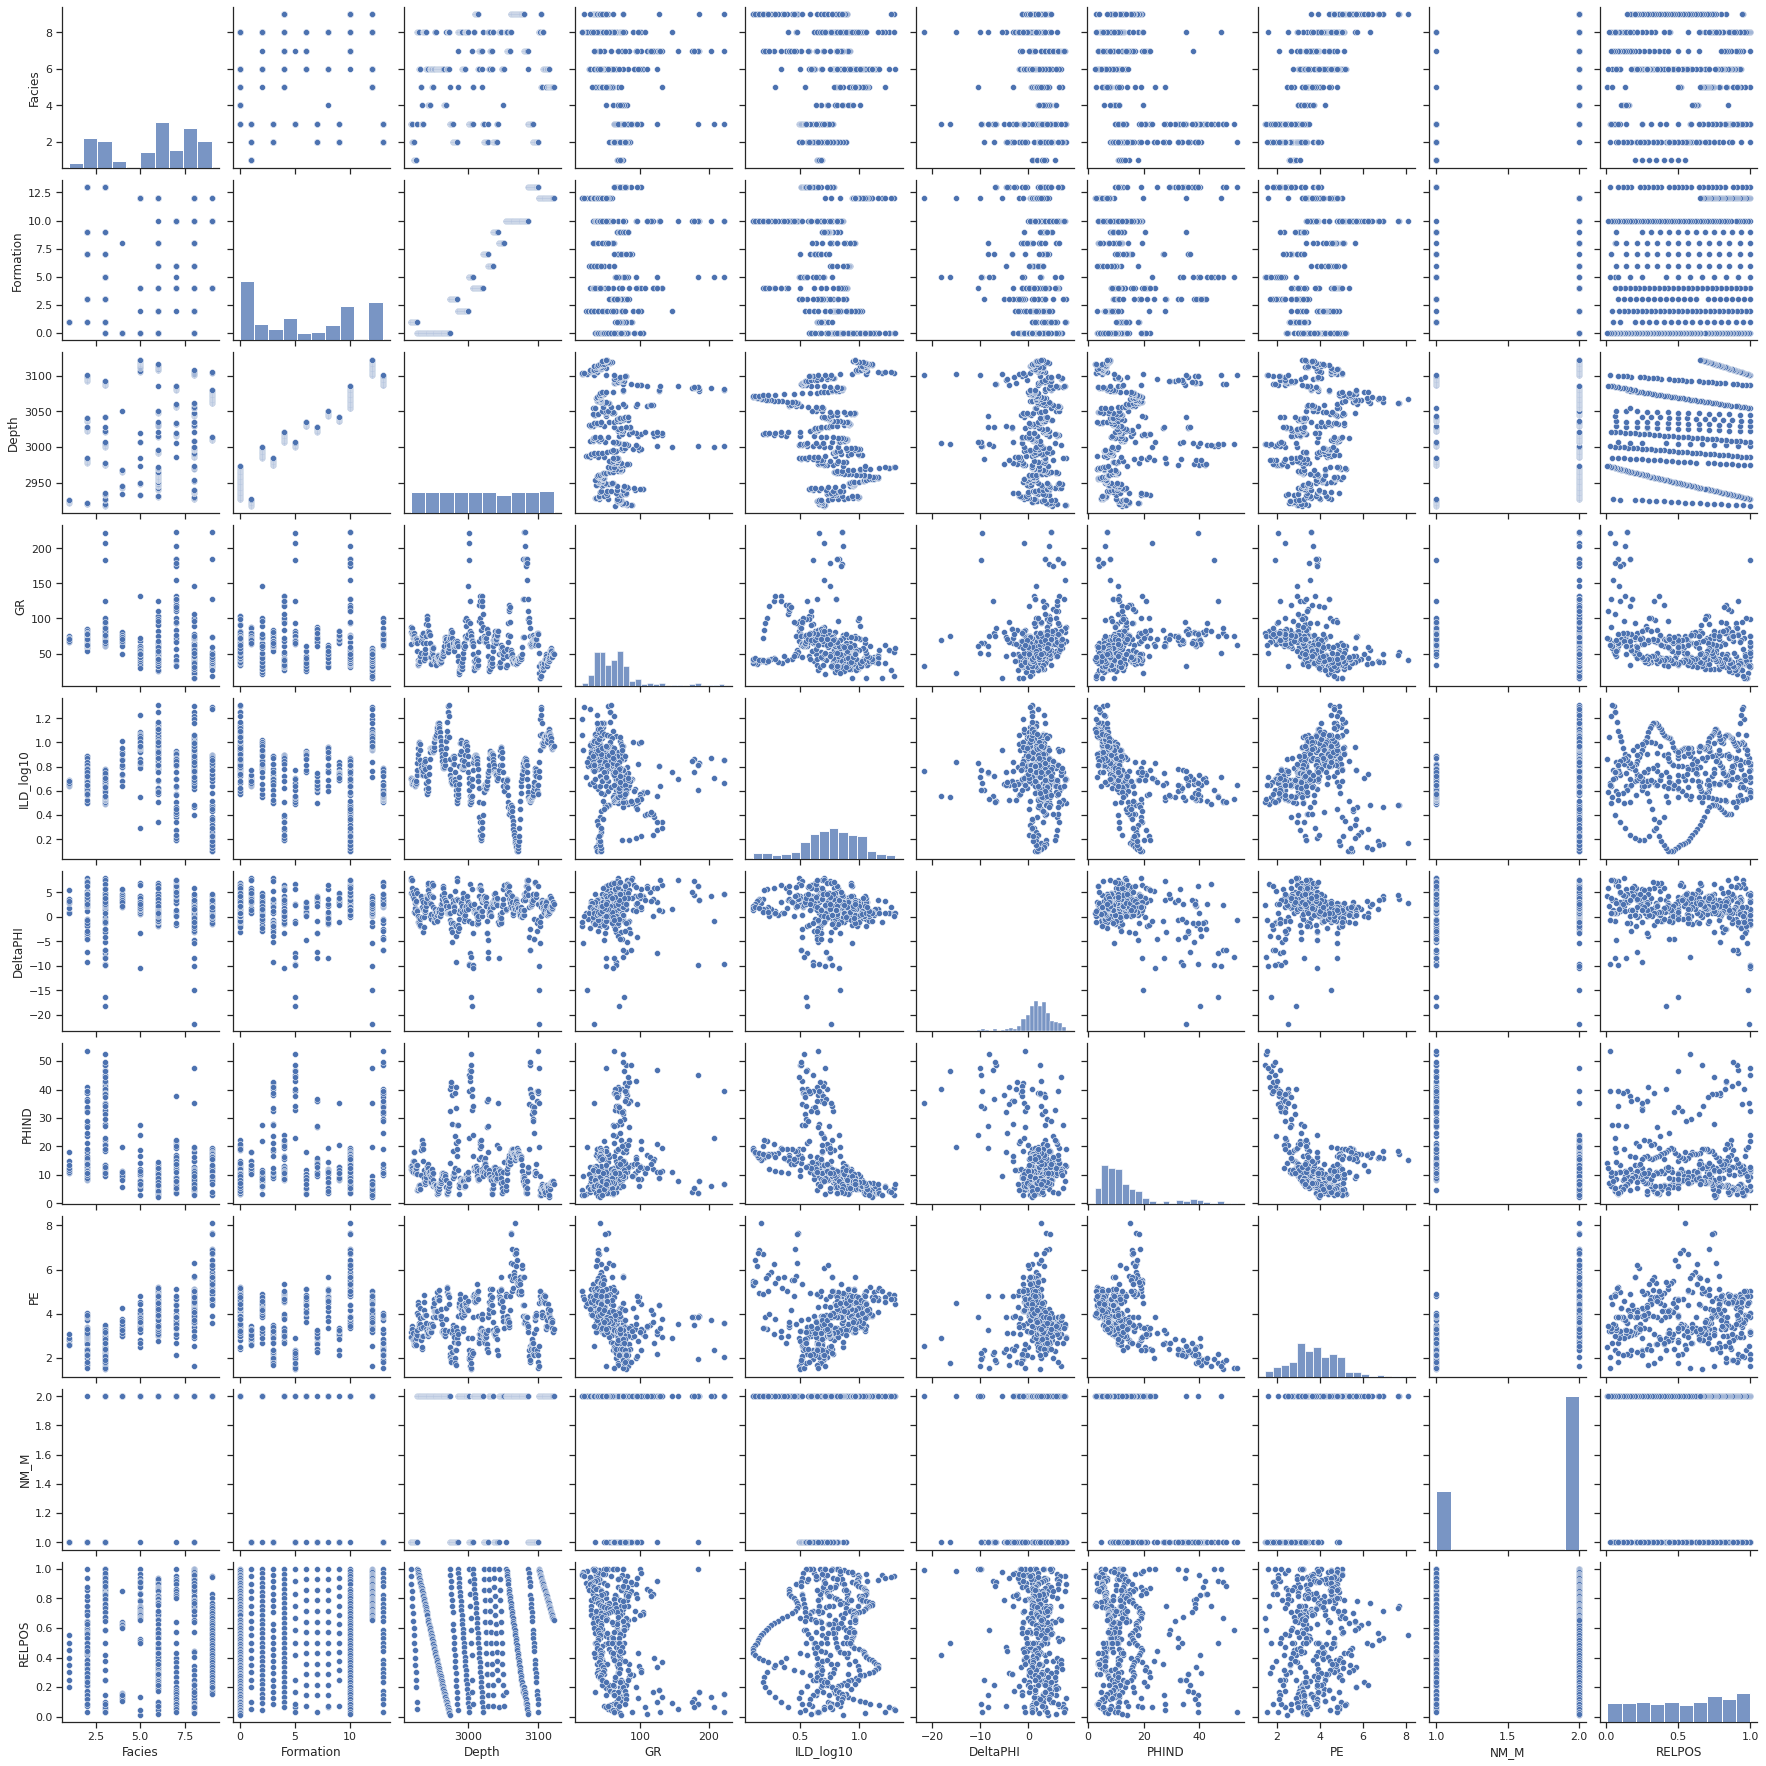

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(set1.sort_values("Depth"))

#We Separate data to target and label 

##Separate target

In [ ]:
X_train = train_set.drop(labels="Facies", axis=1).values
X_train = train_set.drop(labels="GR", axis=1).values
Y_train = train_set['Facies'].values

##Separate label

In [ ]:
X_test = blind_df.drop(labels="Facies", axis=1).values
X_test = blind_df.drop(labels="GR", axis=1).values
Y_test = blind_df['Facies'].values

#Preprocessing

In [ ]:
X_train_scaler = preprocessing.StandardScaler().fit_transform(X_train)
X_test_scaler =preprocessing.StandardScaler().fit_transform(X_test)

#grid search for best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
y =[0.1,0.5,1,5,10]
# x = np.logspace(-3, 2, 6)
X =['auto', 'scale', 1.e-03, 1.e-02, 1.e-01, 1.e+00,]
X

['auto', 'scale', 0.001, 0.01, 0.1, 1.0]

In [ ]:
parameters = {'kernel':['rbf'],
              'C' : X,
              'gamma' : y,
              }


In [ ]:
gsh = GridSearchCV(SVC(), param_grid=parameters,scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [ ]:
gsh.fit(X_train_scaler, Y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 5

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': ['auto', 'scale', 0.001, 0.01, 0.1, 1.0],
                         'gamma': [0.1, 0.5, 1, 5, 10], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [ ]:
gsh.best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

#fit data for svc

In [ ]:
gsh = SVC(kernel = 'rbf', C = 0.3, gamma = 0.1)
gsh.fit(X_train_scaler, Y_train)
Y_test_ = gsh.predict(X_test_scaler)

#validation

##confusion_matrix for test data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_test_)

array([[  0,  89,   0,   0,   0,   0,   0,   0],
       [  0,  72,  17,   0,   0,   0,   0,   0],
       [  0,   0, 117,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   5,   1,   0,   0],
       [  0,   0,   0,   7,   2,  10,   0,   0],
       [  0,   0,   0,   0,   0,  67,   0,   4],
       [  0,   0,   0,   0,   0,   0,   8,   9],
       [  0,   0,   0,   0,   0,   0,   0,  40]])

##classification_report for test data

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           2       0.45      0.81      0.58        89
           3       0.87      1.00      0.93       117
           4       0.12      0.14      0.13         7
           5       0.29      0.11      0.15        19
           6       0.86      0.94      0.90        71
           7       1.00      0.47      0.64        17
           8       0.75      1.00      0.86        40

    accuracy                           0.68       449
   macro avg       0.54      0.56      0.52       449
weighted avg       0.57      0.68      0.61       449



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##confusion_matrix for train data

In [ ]:
Y_test_train = gsh.predict(X_train_scaler)
confusion_matrix(Y_train, Y_test_train)


array([[235,  23,   1,   0,   0,   0,   0,   0,   0],
       [ 11, 710,  15,   2,   0,   0,   0,   0,   0],
       [  0,  22, 587,   5,   1,   0,   0,   0,   0],
       [  0,   0,   6, 160,  17,   1,   0,   0,   0],
       [  0,   0,  13,  17, 139,  47,   1,   0,   0],
       [  0,   0,   2,   0,  17, 433,   7,   3,   0],
       [  0,   0,   2,   0,   0,  10,  75,  11,   0],
       [  0,   0,   1,   0,   0,   0,   1, 494,   2],
       [  0,   0,   0,   0,   0,   0,   3,  35,  55]])

##classification_report for train data

In [ ]:
print(classification_report(Y_train, Y_test_train))

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       259
           2       0.94      0.96      0.95       738
           3       0.94      0.95      0.95       615
           4       0.87      0.87      0.87       184
           5       0.80      0.64      0.71       217
           6       0.88      0.94      0.91       462
           7       0.86      0.77      0.81        98
           8       0.91      0.99      0.95       498
           9       0.96      0.59      0.73        93

    accuracy                           0.91      3164
   macro avg       0.90      0.85      0.87      3164
weighted avg       0.91      0.91      0.91      3164

